<a href="https://colab.research.google.com/github/shi5a/Data-Science-Bootcamp/blob/main/ML_Week1_CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Week 1 Case Study**


###**Group Members:**
Hailah AlHarthi

AlJowhara AlBlaihed

Shaikha AlBilais

Latifa ALNaim




[Customer churn](https://en.wikipedia.org/wiki/Churn_rate) - Predict customer retention. 


### Data
- [churn_data.csv](https://raw.githubusercontent.com/gumdropsteve/intro_to_machine_learning/main/day_05/data/churn_data.csv)
- [Data Dictionary](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)

### Deleverables
1. Analysis of customer data
    - EDA, data viz, etc...
2. Model to predict churn 
    - Classification - LogisticRegression
    - How good is you model?
        - precision, recall, etc...
    - What are the best params?
        - GridSearchCV, etc...
3. Ideas for customer retention programs

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
raw_link = 'https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv'

df = pd.read_csv(raw_link)

# **Understanding Data**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,Yes
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1,No
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,No
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,No
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,No


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6333,5119-KEPFY,Male,0,Yes,No,36,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.00,3440.25,No
6334,6923-JHPMP,Female,0,No,No,2,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,137.1,No
6335,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
6336,4098-NAUKP,Male,1,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.65,5683.6,No
6337,1775-KWJKQ,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.85,6562.9,No


In [ ]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4185,4712-AUQZO,Male,0,No,No,18,No,No phone service,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Mailed check,33.6,550.35,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


In [ ]:
df.describe(exclude='number')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338
unique,6338,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5921,2
top,8100-PNJMH,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3197,3267,4435,5717,3047,2796,3155,2804,2785,3126,2529,2517,3503,3769,2150,11,4650


In [ ]:
df.shape

(6338, 21)

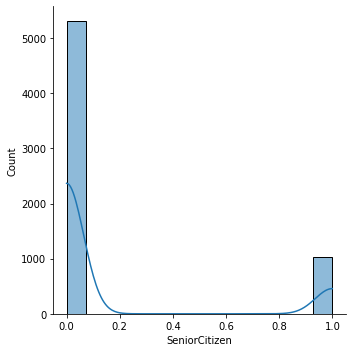

In [ ]:
sns.displot(data=df, x="SeniorCitizen",kde=True) # Show the number of SeniorCitizen  


In [ ]:
df.Churn.value_counts() # the count of the customers who stayed with the company -> 1 or not -> 0


No     4650
Yes    1688
Name: Churn, dtype: int64

In [ ]:
df.gender.value_counts()

Male      3197
Female    3141
Name: gender, dtype: int64

In [ ]:
df.SeniorCitizen.value_counts() # the  young castomers  more than the Senior Citizen

0    5313
1    1025
Name: SeniorCitizen, dtype: int64

In [ ]:
df['Churn'].value_counts()

0    4650
1    1688
Name: Churn, dtype: int64

In [ ]:
Churn_dumm = pd.get_dummies(df['Churn'])
Churn_dumm

,0,1
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
6333,1,0
6334,1,0
6335,1,0
6336,1,0


# **Cleaning Data  (for x , y )**

In [ ]:
df.isna().sum() #there is no NULL data

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df["Churn"] = df["Churn"].replace({'Yes':1,'No':0})

In [ ]:
df[['SeniorCitizen','MonthlyCharges','Churn']]

,SeniorCitizen,MonthlyCharges,Churn
0,0,39.05,1
1,0,19.95,0
2,0,99.95,0
3,0,95.25,0
4,0,56.70,0
...,...,...,...
6333,0,95.00,0
6334,0,80.45,0
6335,0,118.20,0
6336,1,84.65,0


# **Testing Models**


Defining `X` and `y`:

- `X`: the varible(s) that will help predict `y`
- `y`: the "target" (trying to predict it)

In [ ]:
X = df[['SeniorCitizen', 'MonthlyCharges']]
y = df.Churn.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)

In [ ]:
len(y_test)

1268

### **LogisticRegression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression()

In [ ]:
# use training data to fit the model (fit means train)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

***Prediction:***

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
preds = model.predict(X_test)
sum(preds == y_test)

948

In [ ]:
sum(model.predict(X) == y) / len(df)

0.72183654149574

Precision of the model:

In [ ]:
from sklearn.metrics import average_precision_score
precision = average_precision_score(y_test, preds)
precision

0.24409782324732127

Recall of the model:

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
rec = precision_recall_fscore_support(y_test, preds, average=None)
rec

(array([0.75951417, 0.3030303 ]),
 array([0.9760666 , 0.03257329]),
 array([0.85428051, 0.05882353]),
 array([961, 307]))

Mean Squared of the model:

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_test, y_pred=preds)

0.25236593059936907

In [ ]:
y_test[-5:]

2553    1
3693    1
735     1
1137    1
2772    0
Name: Churn, dtype: int64

**Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, scoring='r2')

array([-0.42798244, -0.39571165, -0.37957626, -0.39470661, -0.42300501])

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=preds)

-0.37533174929752233

### **KNeighborsClassifier Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
X = df[['SeniorCitizen', 'tenure']]
y = df.Churn.astype('int')


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)

knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
knn.predict(X_test)

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
sum(knn.predict(X) == y) / 6338

0.7100031555695803

In [ ]:
preds = knn.predict(X_test)

sum(preds == y_test)

911

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true=y_test, y_pred=preds)

0.28154574132492116

In [ ]:
np.mean(y_test)

0.2421135646687697

In [ ]:
preds[-5:]

array([1, 0, 1, 0, 1])

In [ ]:
y_test[-5:]

2553    1
3693    1
735     1
1137    1
2772    0
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, scoring='r2')

array([-0.29486543, -0.25452695, -0.26662849, -0.25725727, -0.28151303])

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=preds)

-0.5343544828100482

# **Pipline**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def LR(**kwargs):
     return make_pipeline(LogisticRegression(**kwargs))


# **Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'logisticregression__fit_intercept':[True, False],'logisticregression__penalty': ['l2', 'l3', 'elasticnet', 'none']}

grid = GridSearchCV(LR(), param_grid, cv=7)
grid

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                  

In [ ]:
grid.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got l3.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got l3.

  FitFailedWarning)
/us

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                  

Best hyperprams:

In [ ]:
grid.best_params_

{'logisticregression__fit_intercept': True,
 'logisticregression__penalty': 'l2'}

# **Making the Best Model**

In [ ]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

model.fit(X_train, y_train)

preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=preds)

0.1518555452624074